<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **02. Air Quality Data Analysis and Customer Report Planning**
---
> **Context**


* Problem Definition
* 🥉Session 1: Identifying air quality trends
* 🥈Session 2: Defining KPI indicators for reporting
* 🥇Session 3: Planning a customized customer report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/02_Air Quality Data Analysis and Customer Report Planning')
os.getcwd()

'/content/drive/MyDrive/DA portfolio/DA_colab/02_Air Quality Data Analysis and Customer Report Planning'

## **Problem Context & Sample Data**
---
> **Scenario 🧑‍🏭 (Marketing, Field Sales, and Data Analyst Collaboration)

```
Due to the continuous deterioration of air quality, outdoor activities have decreased, and the number of customers visiting the store has also declined.
To improve this situation, the marketing team wants to link external air quality with customer behavior and sales data to provide customized reports for strategic sales advantages.
```  

> **Data overview**

* Hourly air quality measurements are collected per date using a total of 13 sensor values.
* Data Specifications ⬇

|Date|Time|CO(GT)|PT08.S1(CO)|NMHC(GT)|C6H6(GT)|PT08.S2(NMHC)|NOx(GT)|PT08.S3(NOx)|NO2(GT)|PT08.S4(NO2)|PT08.S5(O3)|T|RH|AH|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Date|Time|Carbon monoxide|Tin oxide sensor|Non-methane hydrocarbons|Benzene concentration|Titania sensor|NOx concentration|Tungsten oxide (NOx)|NO2 concentration|Tungsten oxide (NO2)|Indium oxide sensor|Temperature|Relative Humidity|Absolute Humidity|

In [12]:
# ▶ Data read
import pandas as pd
df = pd.read_excel('chapter02_airquality.xlsx')
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794






## **Problem & Process Definition**
---
> **Problem Statement**

```
▶ Decreased product usage rate, reduced sales, and loss of competitive edge
```  

> **Expected Outcome**

```
▶ Increased product use, higher sales
```

> **Solution**

```
▶ Provide personalized reports based on air quality data and offer better service than competitors

▶ Session 1 🥉
 - Preprocessing & Time-based trend analysis
▶ Session 2 🥈
 - Defining report indicators and customer-relevant KPIs
▶ Session 3 🥇
 - Building report and story line
```

> **Expected deliverables**  

```
▶ Comparison of report indicators and competitors to suggest timing to replace products to customers
```

> **Utilization scenarios**  

```
▶ Automate delivery of reports via email/SMS
▶ Customer Report dashboard development  
▶ Build real-time air quality data DB and automate data pipeline


```

> **primary codes**  

```
▶ session 1 → replace(), to_datetime(), astype(str)
▶ session 2 → sns.distplot(), plt.axvline(), value_counts()
▶ session 3 → unique(), dt.hour(), plt.xticks
```

## **🥉Session 1**  
**┗ Identify Air Quality Data Trend**  
---

### · Data preprocessing
---
* Check the overall structure of the collected data

  (1) Data shape (size)
  (2) Data type view
  (3) Check for Null values (missing data)
  (4) Check for Outlier values (e.g., abnormal sensor readings)


In [13]:
# ▶ Data type
# ▶ 9357 row, 15 col
print('df', df.shape)

df (9357, 15)


In [14]:
# ▶ Data type confirmation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [15]:
# ▶ Checking null value
print(df.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [16]:
# ▶ Outlier processing
# ▶ If any column value equals -200, it's a sensor error → replace with Null and fill using ffill
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


In [17]:
# ▶ Check data with negative sensor values
# ▶ These are not values that can come from normal sensor readings, so preprocessing is required
df[df['T']== -200].head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,2004-04-01,14:00:00,1.7,-200.0,222,-200.0,-200.0,99.0,-200.0,72.0,-200.0,-200.0,-200.0,-200.0,-200.0
525,2004-04-01,15:00:00,1.9,-200.0,197,-200.0,-200.0,108.0,-200.0,81.0,-200.0,-200.0,-200.0,-200.0,-200.0
526,2004-04-01,16:00:00,2.3,-200.0,319,-200.0,-200.0,131.0,-200.0,93.0,-200.0,-200.0,-200.0,-200.0,-200.0
701,2004-04-08,23:00:00,2.0,-200.0,137,-200.0,-200.0,129.0,-200.0,106.0,-200.0,-200.0,-200.0,-200.0,-200.0
702,2004-04-09,00:00:00,2.4,-200.0,189,-200.0,-200.0,154.0,-200.0,109.0,-200.0,-200.0,-200.0,-200.0,-200.0


In [20]:
# ▶ First replace the outlier value -200 with Null, then use ffill to substitute with the previous sensor value
import numpy as np
df = df.replace(-200, np.nan)
df=df.fillna(method='ffill')

In [21]:
# ▶ Check the updated values
# ▶ Confirm that all sensor values no longer have negative min values
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,2.082195,1102.604396,270.496740,10.190299,942.422741,240.718147,832.618539,109.401453,1452.890358,1030.388426,18.315768,48.814853,1.017382
min,2004-03-10 00:00:00,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,2004-06-16 00:00:00,1.000000,938.250000,275.000000,4.401596,732.500000,97.000000,654.500000,73.000000,1227.750000,726.000000,11.875000,35.425000,0.726213
50%,2004-09-21 00:00:00,1.700000,1061.500000,275.000000,8.276765,910.500000,174.000000,806.750000,102.000000,1459.750000,963.750000,17.575000,48.925001,0.987539
75%,2004-12-28 00:00:00,2.800000,1237.250000,275.000000,14.019301,1117.250000,318.000000,967.500000,137.000000,1676.750000,1286.500000,24.325000,61.875000,1.306671
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,1.469801,219.599578,73.306853,7.565011,269.583076,206.611257,255.704654,47.210774,347.427351,410.906048,8.822898,17.354492,0.404829


In [22]:
# ▶ Re-check for Null values
print(df.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


### · Data preprocessing(Time data)  
---
* Time data


In [23]:
# ▶ Since time data is split into 'Date' and 'Time', we create a new column that combines both
# ▶ Merging requires both columns to be in string format, so convert and merge
# ▶ Complete by converting the merged string to datetime format
import datetime
df['Date_merge'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)
df['Date_merge'] = pd.to_datetime(df['Date_merge'])
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_merge
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [24]:
# ▶ Move the newly created column to position 1
# ▶ Preprocessing complete!
df = df[['Date_merge', 'Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
         'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
         'PT08.S5(O3)', 'T', 'RH', 'AH']]
df.head(5)

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [25]:
# ▶ Final check of data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_merge     9357 non-null   datetime64[ns]
 1   Date           9357 non-null   datetime64[ns]
 2   Time           9357 non-null   object        
 3   CO(GT)         9357 non-null   float64       
 4   PT08.S1(CO)    9357 non-null   float64       
 5   NMHC(GT)       9357 non-null   float64       
 6   C6H6(GT)       9357 non-null   float64       
 7   PT08.S2(NMHC)  9357 non-null   float64       
 8   NOx(GT)        9357 non-null   float64       
 9   PT08.S3(NOx)   9357 non-null   float64       
 10  NO2(GT)        9357 non-null   float64       
 11  PT08.S4(NO2)   9357 non-null   float64       
 12  PT08.S5(O3)    9357 non-null   float64       
 13  T              9357 non-null   float64       
 14  RH             9357 non-null   float64       
 15  AH             9357 n

### · Understanding Air Quality Trend  
---
* Identify trends (changes) in sensor data over time
* matplotlib.pyplot / seaborn

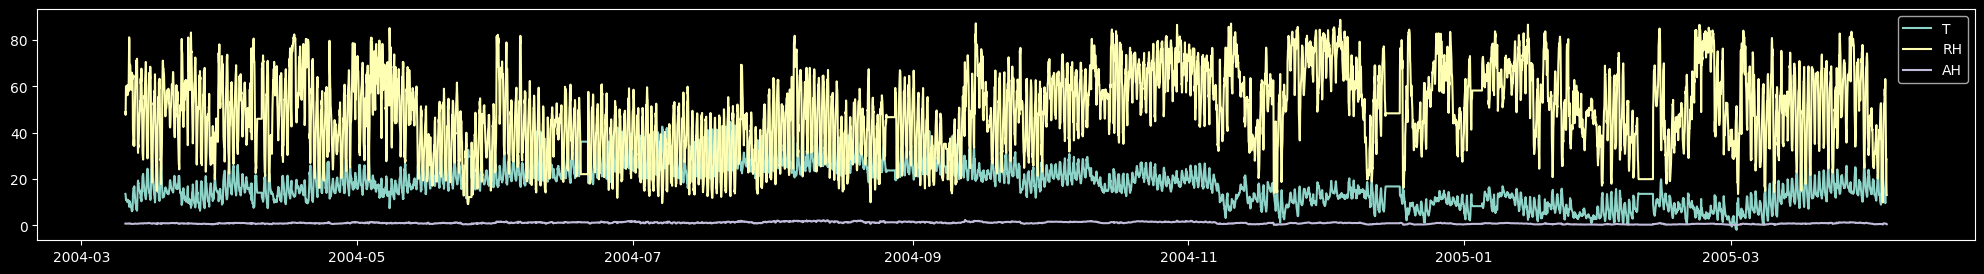

In [26]:
# ▶ 2004-03 ~ 2005-03, 1 year of data
# ▶ Set x, y data and plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['Date_merge'], df['T'], label='T')
plt.plot(df['Date_merge'], df['RH'], label='RH')
plt.plot(df['Date_merge'], df['AH'], label='AH')

plt.legend()
plt.gcf().set_size_inches(25, 3)

In [27]:
# ▶ Fahrenheit (℉) → Celsius (℃)
df['T'] = (df['T'] - 32) * 5/9

In [28]:
# ▶ Celsius (℃) → Fahrenheit (℉)
df['T'] = 9/5 * df['T'] + 32

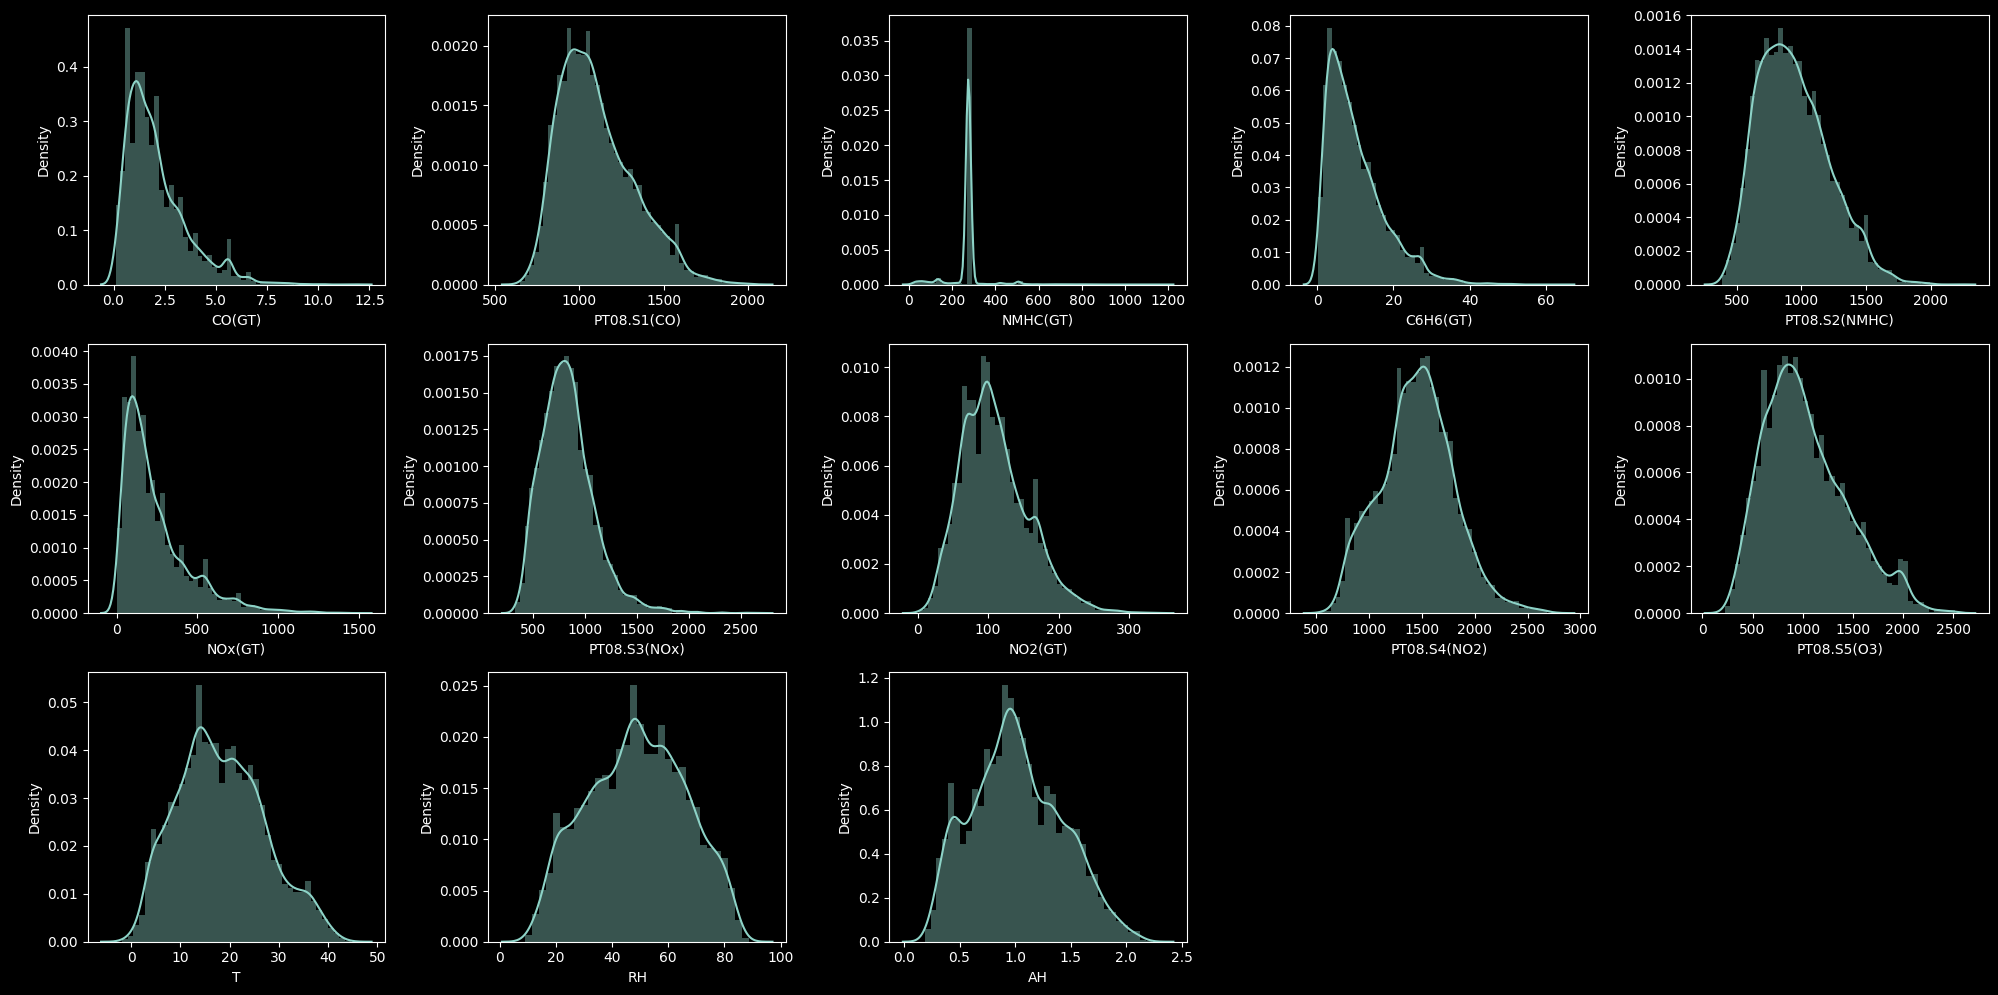

In [29]:
# ▶ Check the distribution for all sensor data

for i in range(3,16):
    plt.subplot(3,5,i-2)
    plt.grid(False)
    sns.distplot(df.iloc[:,i])

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()
plt.show();

## **🥈Session 2**  
**┗  Define Indicators for Customer Report Planning**  
---



### · Indicator Definition (Setting Thresholds)
---
* Define the indicators required for report planning.
* Drill down from broader trends to more specific insights.


In [30]:
# ▶ Basic statistics: Min / Max / Average
for i in range(3,16):
  print(df.columns[i],'▶' ,'Min :', df.iloc[:,i].min(), 'Max :', df.iloc[:,i].max(), 'average :', df.iloc[:,i].mean())

CO(GT) ▶ Min : 0.1 Max : 11.9 average : 2.082195148017527
PT08.S1(CO) ▶ Min : 647.25 Max : 2039.75 average : 1102.6043959958677
NMHC(GT) ▶ Min : 7.0 Max : 1189.0 average : 270.4967404082505
C6H6(GT) ▶ Min : 0.14904773883376646 Max : 63.74147644829163 average : 10.190298936251601
PT08.S2(NMHC) ▶ Min : 383.25 Max : 2214.0 average : 942.4227405507462
NOx(GT) ▶ Min : 2.0 Max : 1479.0 average : 240.71814684193654
PT08.S3(NOx) ▶ Min : 322.0 Max : 2682.75 average : 832.6185387054255
NO2(GT) ▶ Min : 2.0 Max : 339.7 average : 109.40145345730468
PT08.S4(NO2) ▶ Min : 551.0 Max : 2775.0 average : 1452.8903583769725
PT08.S5(O3) ▶ Min : 221.0 Max : 2522.75 average : 1030.3884257774928
T ▶ Min : -1.8999999761580995 Max : 44.60000038147 average : 18.315768049064744
RH ▶ Min : 9.1750001907349 Max : 88.72500038147 average : 48.814852540627456
AH ▶ Min : 0.1846790209991702 Max : 2.2310357155831864 average : 1.017381945032572


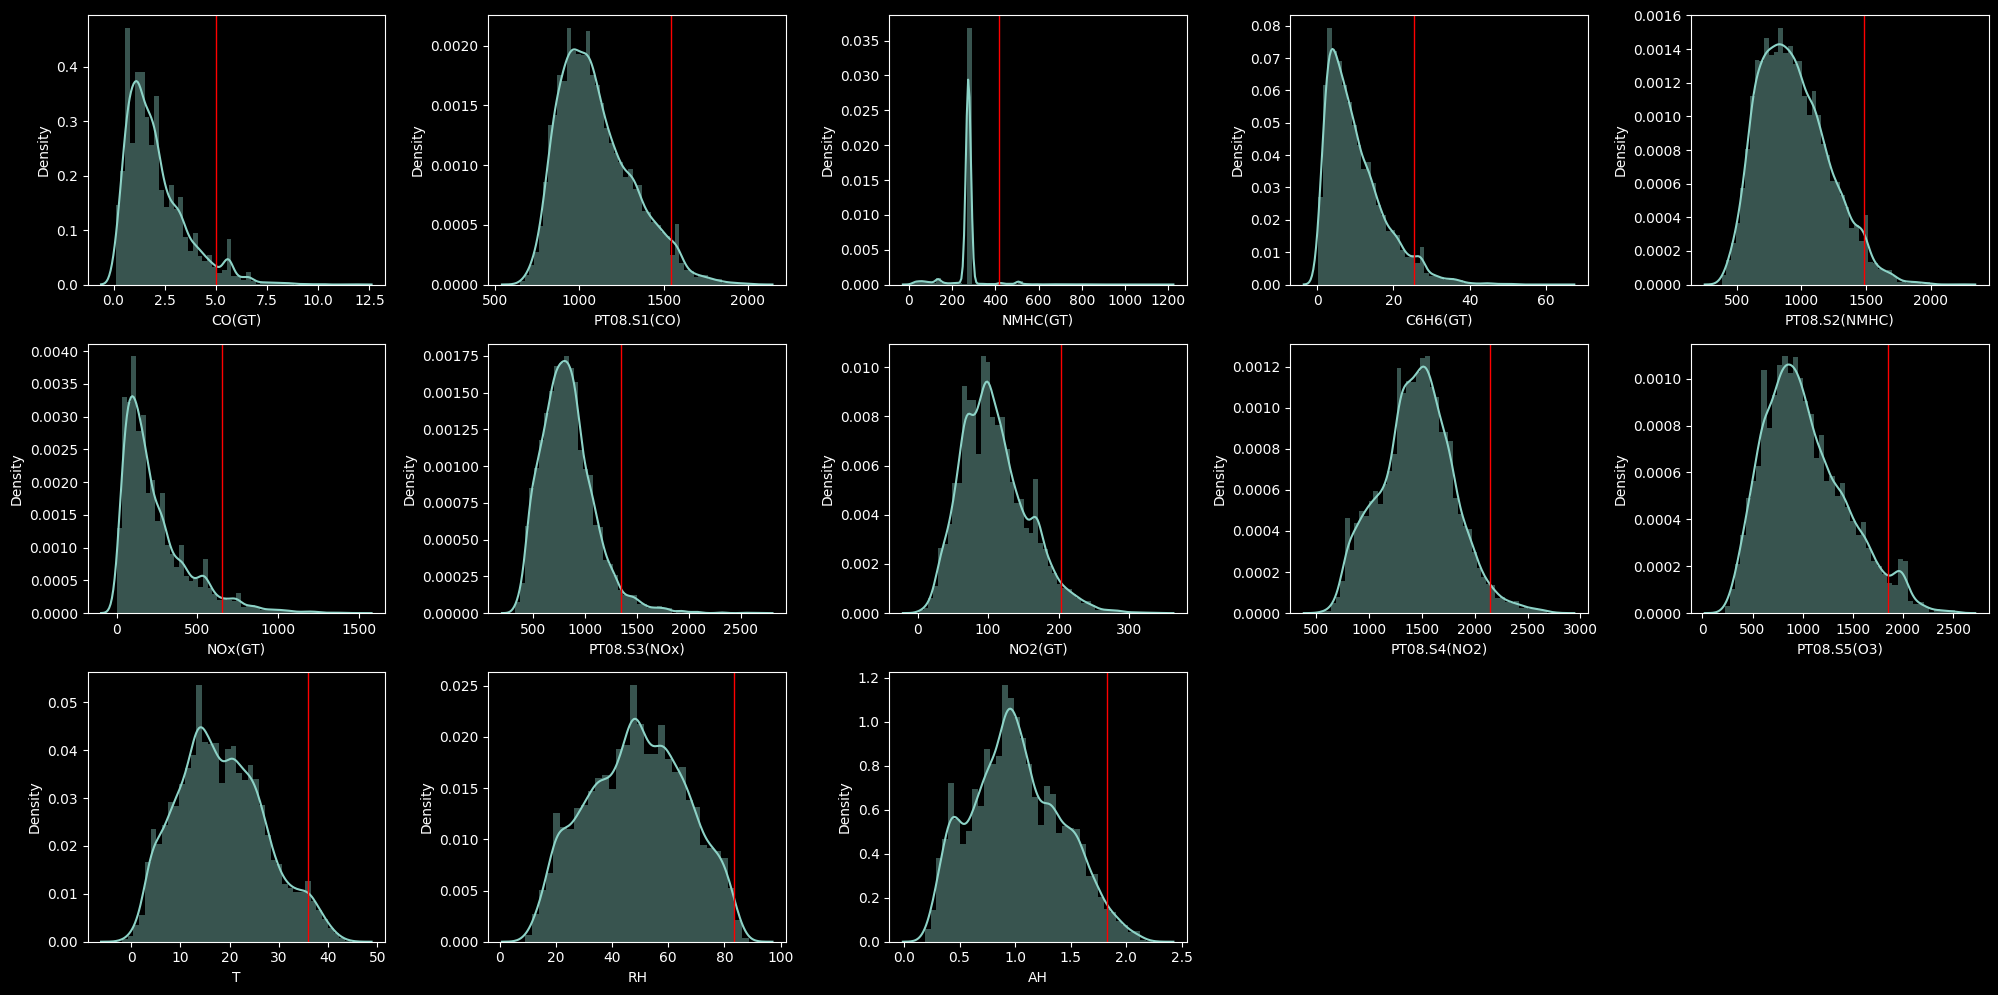

In [31]:
# ▶ Set threshold standards for sensor data
# ▶ For sensors excluding T, RH, and AH, values exceeding mean + 2 standard deviations (2sd) are considered as exceeding the threshold.

for i in range(3,16):
    plt.subplot(3,5,i-2)
    plt.grid(False)
    sns.distplot(df.iloc[:,i])
    plt.axvline(df.iloc[:,i].mean() + 2*df.iloc[:,i].std(), color='r', linewidth=1)

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()
plt.show();



```

### ·Indicator Definition (Identifying Vulnerable Time Periods)
---
* Define the indicators required for report planning.
* Drill down from broader trends to more specific insights.



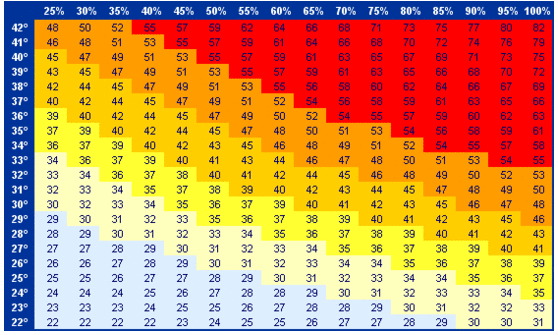

In [32]:
from IPython.display import Image
Image("img1.PNG")

In [33]:
# ▶ Identify vulnerable time periods for temperature (1) - By Day
df[df['T'] > 35]['Date'].value_counts().head(5)

,count
Date,
2004-06-20,24
2004-06-19,11
2004-07-07,9
2004-07-21,9
2004-07-22,9


In [34]:
# ▶ Identify vulnerable time periods for temperature (2) - By Month
# ▶ Create a new column for month to view by month
df['month']=df['Date'].astype(str).str.slice(start=0, stop=7)

In [35]:
df[df['T'] > 35]['month'].value_counts()

,count
month,
2004-07,166
2004-08,129
2004-06,121
2004-09,28


In [36]:
# ▶ Identify vulnerable time periods for temperature (3) - By Hour
df[df['T'] > 35]['Time'].value_counts().head(5)

,count
Time,
16:00:00,68
15:00:00,64
17:00:00,59
13:00:00,56
14:00:00,52


In [37]:
# ▶ Identify vulnerable time periods for humidity (1) - By Day
df[df['RH'] > 60]['Date'].value_counts().head(5)

,count
Date,
2004-11-28,24
2004-11-27,24
2004-12-01,24
2004-12-03,24
2004-12-04,24


In [38]:
# ▶ Identify vulnerable time periods for humidity (2) - By Month
df[df['RH'] > 60]['month'].value_counts().head(5)

,count
month,
2004-10,446
2004-11,366
2004-12,335
2005-01,291
2005-03,254


In [39]:
# ▶ Identify vulnerable time periods for humidity (3) - By Hour
df[df['RH'] > 60]['Time'].value_counts().head(5)

,count
Time,
06:00:00,203
05:00:00,199
04:00:00,197
07:00:00,196
03:00:00,181


### · Indicator Definition (Finding Comfortable Time Periods)
---
* Define the indicators required for report planning.
* Drill down from broader trends to more specific insights.



In [40]:
# ▶ Define comfortable range: Temperature (T): 25–27°C / Humidity (RH): 35–40%
df_good = df[ ((df['T'] >= 25) & (df['T'] <= 27)) & ((df['RH'] >= 35) & (df['RH'] <= 40)) ]
df_good.head(5)

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month
1077,2004-04-24 15:00:00,2004-04-24,15:00:00,1.7,1222.50,192.0,8.953194,937.50,91.0,883.50,89.0,1610.00,879.50,25.550000,36.049999,1.162886,2004-04
1609,2004-05-16 19:00:00,2004-05-16,19:00:00,2.7,1403.25,275.0,15.060586,1150.50,147.0,747.00,125.0,1820.25,1124.75,25.475000,37.350000,1.199513,2004-05
1751,2004-05-22 17:00:00,2004-05-22,17:00:00,2.8,1466.25,275.0,15.807518,1173.75,152.0,680.00,115.0,1964.75,1301.50,25.450000,39.825000,1.277117,2004-05
1777,2004-05-23 19:00:00,2004-05-23,19:00:00,1.1,1085.25,275.0,5.849489,804.75,69.0,972.25,65.0,1528.25,717.75,25.275001,36.275000,1.151340,2004-05
2081,2004-06-05 11:00:00,2004-06-05,11:00:00,1.1,883.00,275.0,5.287938,777.75,61.0,1129.50,57.0,1544.50,607.50,25.875000,36.900000,1.213267,2004-06


In [41]:
# ▶ Define comfortable range: Temperature (T): 25–27°C / Humidity (RH): 35–40%
df_good['T'].mean(), df_good['RH'].mean()

(np.float64(25.843192474383184), np.float64(36.9990611344995))

In [42]:
# ▶ Comfortable Dates
df_good['Date'].value_counts().head(5)

,count
Date,
2004-09-08,9
2004-09-05,4
2004-09-06,4
2004-07-08,3
2004-06-14,3


In [43]:
# ▶ Comfortable Months
df_good['month'].value_counts().head(5)

,count
month,
2004-09,25
2004-06,17
2004-07,15
2004-08,9
2004-05,3


In [44]:
 # ▶ Comfortable Time Periods
 df_good['Time'].value_counts().head(5)

,count
Time,
09:00:00,10
22:00:00,9
19:00:00,5
21:00:00,5
23:00:00,5


### · Indicator Definition (Ventilation Time Detection)
---
* Define the indicators required for report planning.
* Drill down from broader trends to more specific insights.



In [45]:
# ▶ CO(GT): Carbon Monoxide
df.head(5)

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month
0,2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03
1,2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03
2,2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03
3,2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03
4,2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03


In [46]:
# ▶ If CO(GT) exceeds mean + 2sd, it is considered exceeding the previously defined threshold
# ▶ When threshold is exceeded, ventilation is needed
df_co = df[df['CO(GT)'] > df['CO(GT)'].mean() + 2*df['CO(GT)'].std()]['Time'].value_counts()
df_co.head(5)

,count
Time,
19:00:00,77
20:00:00,59
18:00:00,56
09:00:00,44
17:00:00,31


In [47]:
# ▶ Convert to a readable DataFrame
df_co = pd.DataFrame(df_co).reset_index()
df_co.columns = ['Time', 'CO(GT)']
df_co.head(5)

,Time,CO(GT)
0,19:00:00,77
1,20:00:00,59
2,18:00:00,56
3,09:00:00,44
4,17:00:00,31


In [48]:
# ▶ Check the converted data types
df_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    24 non-null     object
 1   CO(GT)  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes


In [49]:
# ▶ Convert Time data format
df_co = df_co.sort_values(by=['Time'])
df_co['Time'] = pd.to_datetime(df_co['Time'].astype(str))
df_co = df_co.reset_index(drop=True)

In [50]:
df_co = df_co.sort_values(by=['Time'])
df_co.head(5)

,Time,CO(GT)
0,2025-03-30 00:00:00,9
1,2025-03-30 01:00:00,8
2,2025-03-30 02:00:00,8
3,2025-03-30 03:00:00,8
4,2025-03-30 04:00:00,8


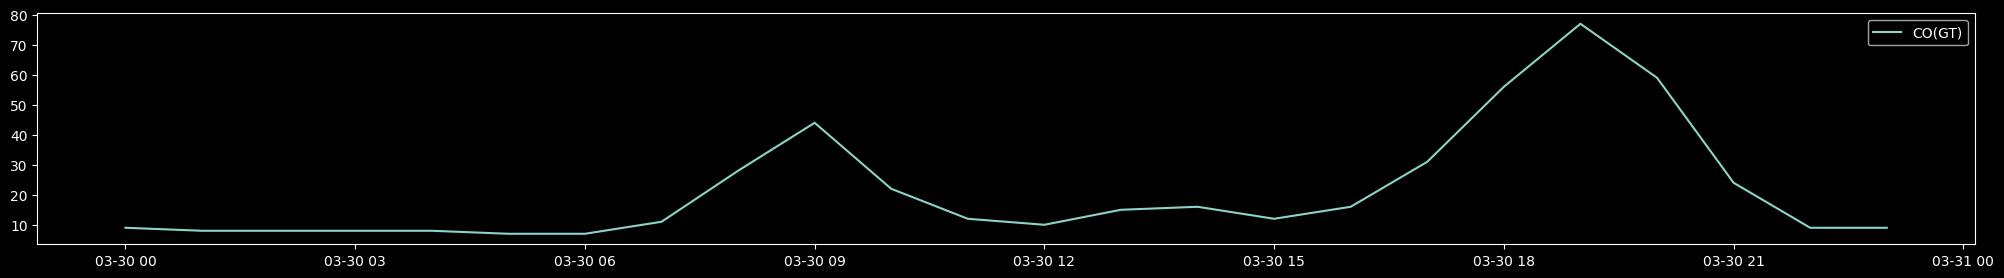

In [51]:
# ▶ Identify peak CO(GT) time: 9 AM and 6–8 PM
plt.style.use(['dark_background'])
plt.plot(df_co['Time'], df_co['CO(GT)'], label='CO(GT)')
plt.legend()
plt.gcf().set_size_inches(25, 3)

## **🥇Session 3**  
**┗  Building a Storyline for the Customer Report**  
---




```
# This is formatted as code
```

### · Selecting the Table of Contents
---
* Design the purpose and content of the report.
* Use the indicators created in Session 2 to generate the report.


[Report Table of Contents]
```
When a customer receives the air quality report,
they should be able to understand a summary of their home's current air quality,
recognize comfortable vs. uncomfortable days,
and receive ventilation recommendations based on pattern analysis,
so that they can increase the number of comfortable days.


```
(1) Current Air Quality Status at Home

Monitoring of temperature and humidity
Number of times harmful substances exceed threshold (※ on an hourly basis)

(2) Number of Comfortable and Uncomfortable Days

Number of comfortable days and months in a year
Number of uncomfortable days and months in a year
(※ Comfortable: Avg. temperature 22–26℃, Avg. humidity 30–40%
Uncomfortable: Avg. temperature over 26℃, Avg. humidity over 50%)

(3) Detailed Analysis of Uncomfortable Hours

Status of uncomfortable time periods
Recommended ventilation times

#### · (1) (1) Current Air Quality Status at Home
 * Monitoring of temperature and humidity
 * Number of times harmful substances exceed threshold (※ hourly basis)

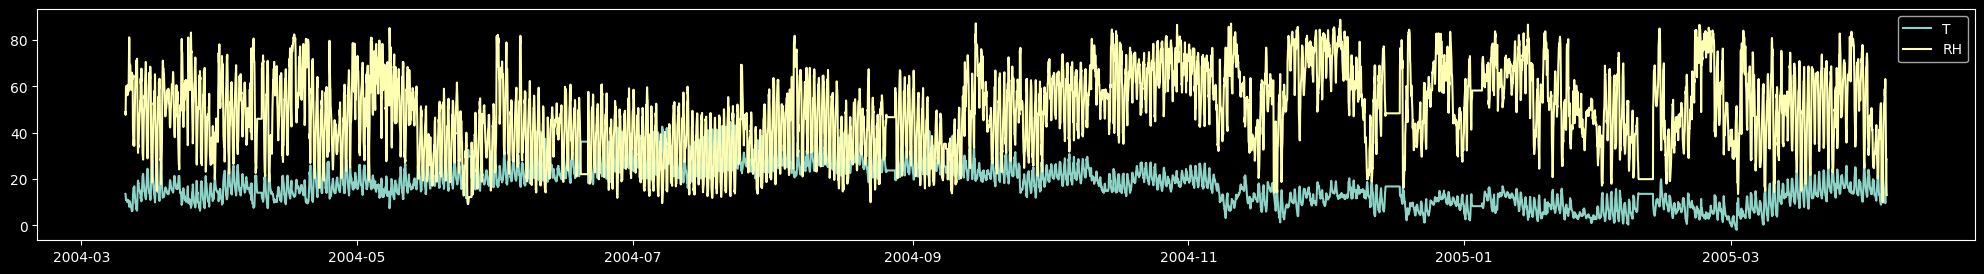

In [52]:
# ▶ Monitor temperature and humidity at home over 1 year
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['dark_background'])
plt.plot(df['Date_merge'], df['T'], label='T')
plt.plot(df['Date_merge'], df['RH'], label='RH')
plt.legend()
plt.gcf().set_size_inches(25, 3)

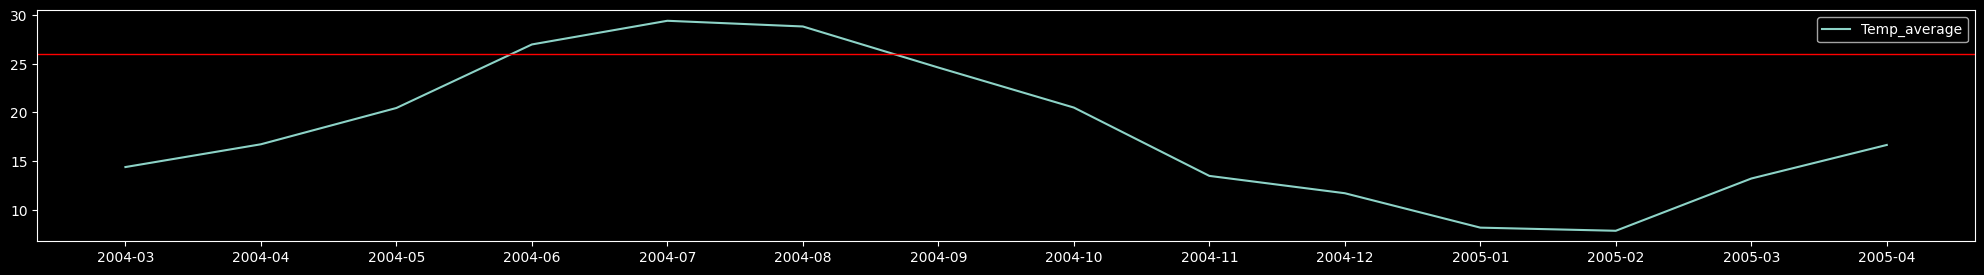

In [53]:
# ▶ Monthly average temperature
plt.plot(pd.DataFrame(df['T'].groupby(df['month']).mean()), label = "Temp_average")
plt.axhline(26, color='r', linewidth=1)
plt.legend()
plt.gcf().set_size_inches(25, 3)

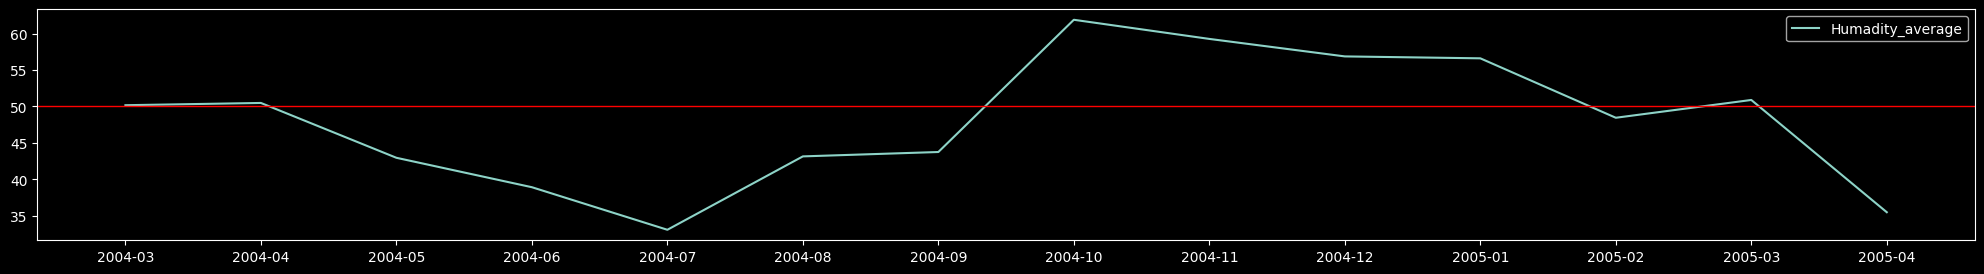

In [54]:
# ▶ Monthly average humidity
plt.plot(pd.DataFrame(df['RH'].groupby(df['month']).mean()), label = "Humadity_average")
plt.axhline(50, color='r', linewidth=1)
plt.legend()
plt.gcf().set_size_inches(25, 3)

In [55]:
df.head(5)

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month
0,2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03
1,2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03
2,2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03
3,2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03
4,2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03


In [56]:
# ▶ Number of times harmful substances exceeded threshold
for i in range(3,13) :
  print(df.columns[i],":", round(len(df[df.iloc[:,i] > df.iloc[:,i].mean() + 2*df.iloc[:,i].std()]) / 24,0), "days")

CO(GT) : 21.0 days
PT08.S1(CO) : 17.0 days
NMHC(GT) : 12.0 days
C6H6(GT) : 20.0 days
PT08.S2(NMHC) : 16.0 days
NOx(GT) : 21.0 days
PT08.S3(NOx) : 14.0 days
NO2(GT) : 15.0 days
PT08.S4(NO2) : 10.0 days
PT08.S5(O3) : 18.0 days


#### · (2) Number of Comfortable and Uncomfortable Days
---
 * Number of comfortable days and months in a year
 * Number of uncomfortable days and months in a year
 (※ Comfortable: average temperature 22–26℃, average humidity 30–40%
Uncomfortable: average temperature ≥ 26℃, average humidity ≥ 50%)




In [57]:
# ▶ Create a new DataFrame with average daily temperature and humidity
df_good_bad = pd.DataFrame({'Date':df['Date'].unique(),
                            'T_D': list(df['T'].groupby(df['Date']).mean()),
                            'RH_D': list(df['RH'].groupby(df['Date']).mean())})

df_good_bad.head(5)

,Date,T_D,RH_D
0,2004-03-10,12.020833,54.883334
1,2004-03-11,9.833333,64.069791
2,2004-03-12,11.292708,51.107292
3,2004-03-13,12.866319,51.530903
4,2004-03-14,16.016667,48.843750


In [58]:
# ▶ Total of 14 comfortable days
df_good_bad[ ((df_good_bad['T_D'] >= 22) &  (df_good_bad['T_D'] <= 26)) & ((df_good_bad['RH_D'] >= 30) &  (df_good_bad['RH_D'] <= 40)) ]

,Date,T_D,RH_D
67,2004-05-16,22.359375,34.831250
69,2004-05-18,23.740972,30.984722
70,2004-05-19,22.989583,37.689583
71,2004-05-20,23.642361,37.434375
72,2004-05-21,23.471875,34.728125
78,2004-05-27,22.863542,32.075000
81,2004-05-30,23.715625,31.282292
86,2004-06-04,23.394792,39.429167
89,2004-06-07,25.553125,37.701042
104,2004-06-22,25.508333,37.974653


In [59]:
# ▶ Total of 3 uncomfortable days
df_good_bad[ (df_good_bad['T_D'] >= 26) & (df_good_bad['RH_D'] >= 50)]

,Date,T_D,RH_D
148,2004-08-05,26.297917,56.647917
149,2004-08-06,26.483333,58.032292
151,2004-08-08,28.046181,50.145139


#### · (3) Detailed Analysis of Uncomfortable Hours
---
 * Status of uncomfortable time periods
 * Recommended ventilation times



In [60]:
# ▶ Filter data based on conditions for uncomfortable days
df_bad = df[ (df['T'] >= 26) & (df['RH'] >= 50)]['Time'].value_counts()
df_bad = pd.DataFrame(df_bad).reset_index()
df_bad.columns = ['Time', 'bad_hour']

df_bad=df_bad.sort_values(by=['Time'])
df_bad['Time']=pd.to_datetime(df_bad['Time'].astype(str))
df_bad=df_bad.reset_index(drop=True)

In [61]:
df_bad.head(5)

,Time,bad_hour
0,2025-03-30 00:00:00,11
1,2025-03-30 01:00:00,10
2,2025-03-30 02:00:00,6
3,2025-03-30 03:00:00,3
4,2025-03-30 04:00:00,5


In [62]:
# ▶ Extract only the time column
df_bad['Time'] = df_bad['Time'].dt.hour

In [63]:
df_bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Time      20 non-null     int32
 1   bad_hour  20 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 372.0 bytes


In [64]:
# ▶ Insert 0 values for missing time slots
df_append = pd.DataFrame({'Time':[10, 12, 13, 14],
                          'bad_hour':[0,0,0,0]})
df_append.head(5)

,Time,bad_hour
0,10,0
1,12,0
2,13,0
3,14,0


In [65]:
# ▶ Data Concat
df_bad1=pd.concat([df_bad, df_append], axis=0).reset_index(drop=True)

In [66]:
# ▶ Sort again in ascending order by time
df_bad1=df_bad1.sort_values(by=['Time']).reset_index(drop=True)

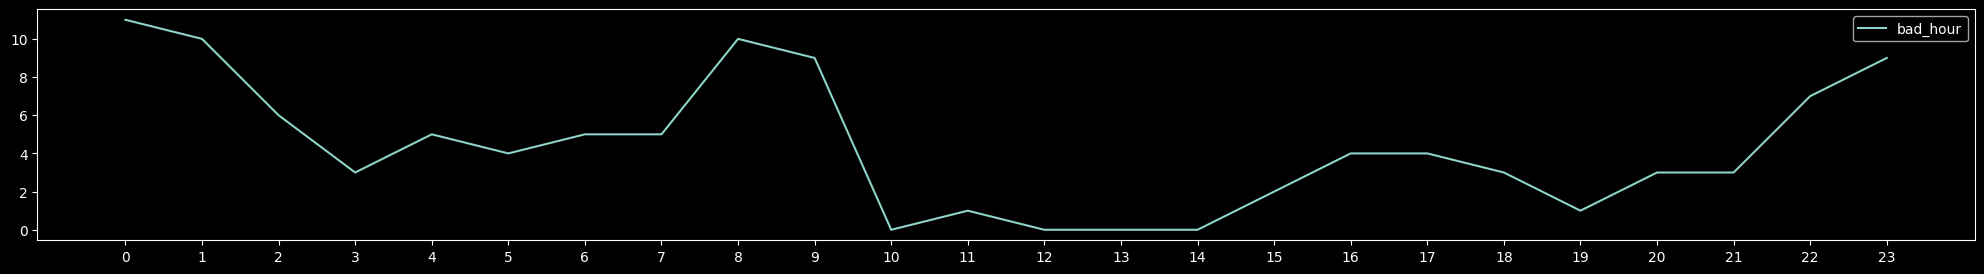

In [67]:
# ▶ Uncomfortable time slots
plt.plot(df_bad1['Time'], df_bad1['bad_hour'], label='bad_hour')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.legend()
plt.gcf().set_size_inches(25, 3)

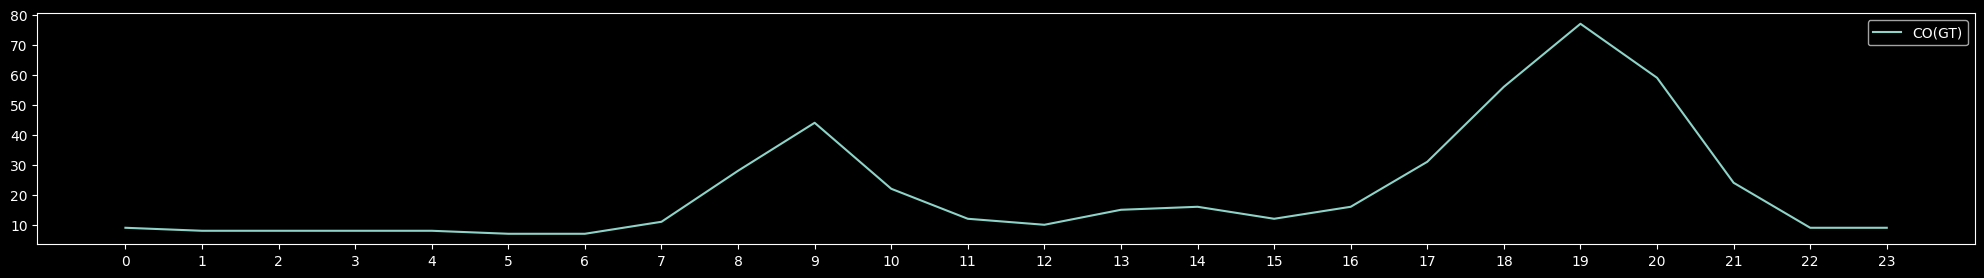

In [68]:
# ▶ Recommended ventilation time slots
plt.style.use(['dark_background'])
plt.plot(df_co['CO(GT)'], label='CO(GT)')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.legend()
plt.gcf().set_size_inches(25, 3)